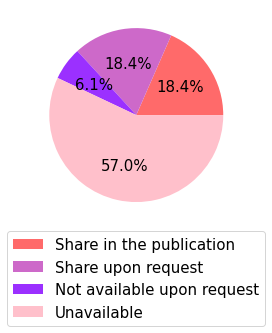

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv ('figure1.csv')

reply = df["r"]
reason = df["Data"]
c=['#FF6A6A','#CD69C9','#9B30FF','#FFC0CB']


plt.pie(reason, colors=c, autopct='%1.1f%%')
plt.legend(loc='upper center', labels = reply, bbox_to_anchor=(0.5, -0), ncol=1, fontsize=15)
plt.show()

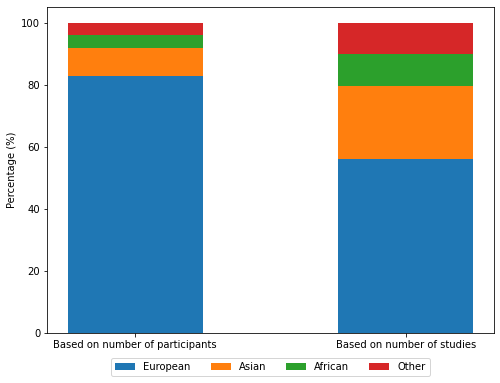

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

df = pd.read_csv ('tcr.csv')

data = np.zeros((4,2))
data[:,0] = (np.array(df[["Number of European participants", "Number of Asian participants", "Number of African participants", "Number of Other participants"]]).sum(0))

people = ["European", "Asian", "African", "Other"]
for v in df["Race/Ethnicity/Ancestry information"].values:
    v = v.split(",")
    for i in v:
        i = i.strip()
        data[people.index(i), 1] += 1
# print(data)

x = ["Based on number of participants", "Based on number of studies"]

data = data / data.sum(0) * 100

fig, ax= plt.subplots(figsize=(8,6))

for i in range(len(data)):
    plt.bar(x, data[i], bottom = data[:i].sum(0), width = 0.5)

plt.ylabel('Percentage (%)')
plt.legend(people, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=4)

plt.show()
#plt.title('Comparisons of ancestry distribution')


#plt.savefig('compare_distribution_0609.png', dpi=300, bbox_inches='tight', pad_inches=2)

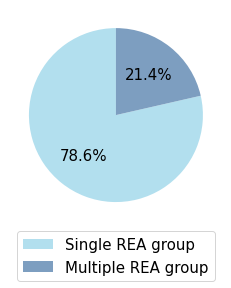

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv ('tcr.csv')

data = np.zeros((2,))

for v in df["Race/Ethnicity/Ancestry information"].values:
    v = v.split(",")
    if len(v) == 1:
        data[0] += 1
    else:
        data[1] += 1

data = data / data.sum()
group = ["Single REA group","Multiple REA group"]



c=['#B2DFEE','#7D9EC0']

plt.rcParams['font.size'] = 15.0

plt.pie(data, colors=c, autopct='%1.1f%%', labeldistance=1, startangle=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0), ncol=1, labels= group)
plt.show()

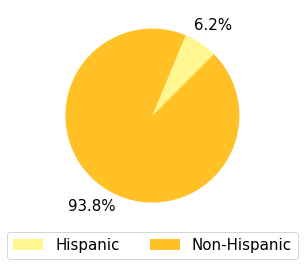

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv ('tcr.csv')


people = ["European", "Asian", "African", "Other"]
data = np.array(df[["Number of Hispanic participants", "Number of non-Hispanic participants"]].values)
mask = np.array(df[["Number of Hispanic participants", "Number of non-Hispanic participants"]].isnull())
ethnic = ['Hispanic','Non-Hispanic']

data[mask] = 0
data = data.sum(0)


colors = ['#FFF68F', '#FFC125']

plt.pie(data, autopct='%2.1f%%', labels=['']*2, pctdistance=1.25, labeldistance=1.4, startangle=45, colors=colors)
plt.legend(loc='upper center', labels = ethnic, bbox_to_anchor=(0.5, 0), ncol=2, fontsize=15)

plt.show()

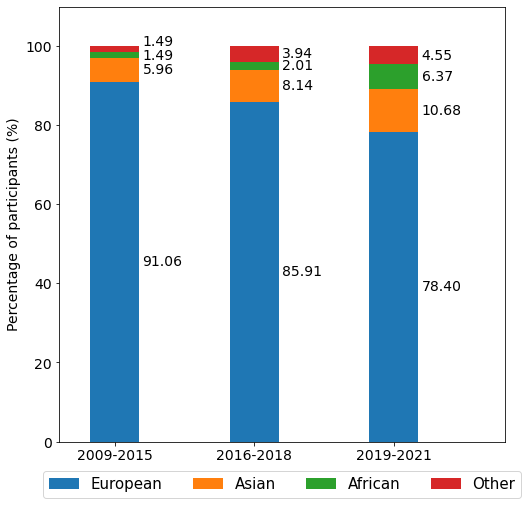

In [13]:
import matplotlib.pyplot as plt
import numpy as  np

df = pd.read_csv ('tcr.csv')

year = ["2009-2015", "2016-2018", "2019-2021"]
race = ["European", "Asian", "African", "Other"]

data = np.zeros((4,3))

num_people = np.array(df[["Number of European participants", "Number of Asian participants", "Number of African participants", "Number of Other participants"]].values)

# print(people)

for i in range(len(num_people)):
    s = df["Study"][i]
    s = s.split(")")[-2].split("(")[-1]
    s = int(s)
         
    if int(s) <= 2015:
        data[:, 0] += num_people[i,:]
    elif int(s) >= 2019:
        data[:, 2] += num_people[i,:]
    else:
        data[:, 1] += num_people[i,:]
# print(data)

data = data / data.sum(0) * 100
# print(data)

width = 0.35

plt.rcParams['font.size'] = 14.0

fig, ax = plt.subplots(figsize=(8,8))

for i in range(4):
    ax.bar(year, data[i], width, label= people, bottom = np.sum(data[0:i,:], axis=0))

for row in range(3):
    for people in range(4):
        if row == 0 and people == 3:
            x = row + 0.2
            y = np.sum(data[:people, row]) + (data[people, row] / 2)+1
        else:
            x = row + 0.2
            y = np.sum(data[:people, row]) + (data[people, row] / 2)-1
        ax.text(x, y, "{:.2f}".format(data[people, row]))


ax.set_xlim([-0.4,2.8])
ax.set_ylim([0,110])
ax.set_ylabel('Percentage of participants (%)')
#ax.set_title('Ancestry Distribution over Years')
ax.legend(loc='upper center', labels = race, bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize= 15)

plt.savefig('ancestry_distribution_overyears_0609', dpi=300, bbox_inches='tight', pad_inches=2)

plt.show()

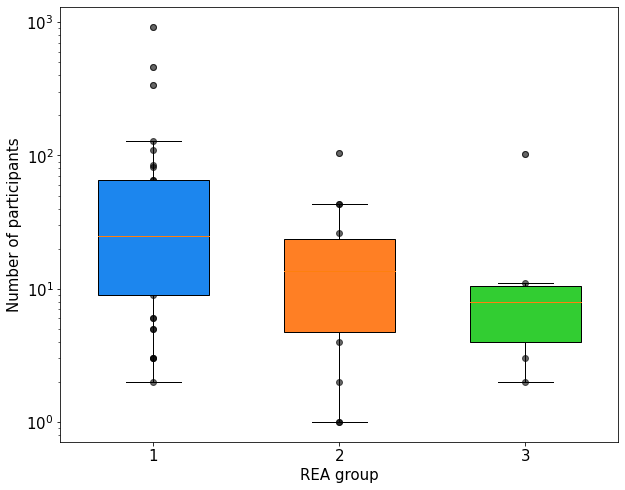

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

flierprops = dict(marker='o', alpha=0.5, color='black')

df = pd.read_csv ('tcr.csv')
total_data = np.array(df[["Number of European participants", "Number of Asian participants", "Number of African participants"]].values)
#print(total_data)

data = []
for i in range(total_data.shape[1]):
    x = total_data[:,i]
    x = x[x!=0]
    data.append(x)

plt.rcParams['font.size'] = 15.0

fig, ax= plt.subplots(figsize=(10,8))

bplot = ax.boxplot(data, widths = 0.6, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ["#1C86EE", "#FF7F24", "#32CD32"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
for i in range(len(data)):
    y = data[i]
    x = np.ones_like(y) * (i+1)
    ax.scatter(x, y, color = 'k', alpha=0.6)
#plt.title('Number of study participants')
plt.xlabel('REA group', fontsize=15)
plt.ylabel('Number of participants', fontsize=15)
ax.set_yscale('log')



plt.show()
# plt.savefig('ancestry boxplot0609.png', dpi=300, bbox_inches='tight', pad_inches=2)

[1027   66  105   75]


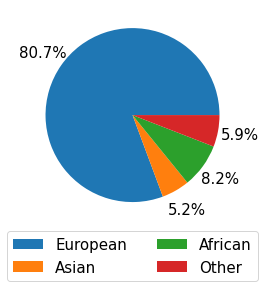

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv ('tcr.csv')

total_data = np.array(df[["Number of European participants", "Number of Asian participants", "Number of African participants", "Number of Other participants"]].values)
data = []
for i, s in enumerate(df['Study'].values):
    if "COV" in s or "CoV" in s:
        # print(i)
        data.append(total_data[i])

data = np.array(data).sum(0)
print(data)

#df = pd.read_csv ('figure7.csv')

#reason = df["R"]
#reply = df["D"]
#c=['#FF6A6A','#CD69C9','#9B30FF','#FFC0CB']
people = ["European", "Asian", "African", "Other"]


plt.rcParams['font.size'] = 15.0


plt.pie(data, autopct='%2.1f%%', labels=['']*4, pctdistance=1.25, labeldistance=1.4)
plt.legend(loc='upper center', labels=people, bbox_to_anchor=(0.5, -0.0), ncol=2, fontsize=15)


plt.show()

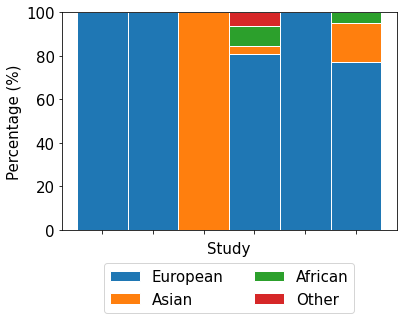

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

df = pd.read_csv ('tcr.csv')

race = ["European", "Asian", "African", "Other"]

total_data = np.array(df[["Number of European participants", "Number of Asian participants", "Number of African participants", "Number of Other participants"]].values)
data = []
for i, s in enumerate(df['Study'].values):
    if "COV" in s or "CoV" in s:
        # print(i)
        data.append(total_data[i])

data = np.array(data).T
# print(data)

data = data / data.sum(0) * 100

plt.rcParams['font.size'] = 15.0

for i in range(len(data)):
    plt.bar(range(data.shape[1]), data[i], bottom = data[:i].sum(0), width = 1, edgecolor = 'white')
 
#Custom X axis
plt.xticks(range(data.shape[1]), [])
#plt.xticks(rotation=45)
#plt.xlabel("Studies")
plt.xlabel('Study')
plt.ylabel('Percentage (%)')

plt.legend(race, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)


#plt.savefig("each_covid_distribution0609.png", dpi=300, bbox_inches='tight', pad_inches=2)